<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [36]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install matplotlib


  Using cached yfinance-0.1.67-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.35
    Uninstalling yfinance-0.2.35:
      Successfully uninstalled yfinance-0.2.35



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\wilmo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
"mamba" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\wilmo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/a0/ef/93321cf55180a778b4d97919b28739874c0afab90e7b9f5b232db70f47c2/fonttools-4.47.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.8 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\wilmo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
# Create a ticker object for TSLA
tsla_ticker = yf.Ticker("TSLA")

# Now you can use this object to fetch various information about the stock


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
# Create a ticker object for TSLA
tsla_ticker = yf.Ticker("TSLA")

# Extract historical stock data
tesla_data = tsla_ticker.history(period="max")

# Display the first few rows of the DataFrame
print(tesla_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
# Create a ticker object for TSLA
tsla_ticker = yf.Ticker("TSLA")

# Extract historical stock data
tesla_data = tsla_ticker.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [9]:
from bs4 import BeautifulSoup

# Assuming you've already obtained html_data using the requests library

# Create a BeautifulSoup object
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can navigate and extract information from the HTML
# For example, let's print the title of the webpage
title = soup.title
print(f"Website Title: {title.text}")


Website Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [16]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Locate the table with Tesla Revenue
    tesla_table = soup.find_all("tbody")[1]

    # Initialize empty lists to store data
    dates = []
    revenues = []

    # Loop through rows and columns of the table
    for row in tesla_table.find_all('tr')[1:]:
        columns = row.find_all('td')
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()

        # Append data to lists
        dates.append(date)
        revenues.append(revenue)

    # Create DataFrame from the lists
    tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

    # Display the DataFrame
    print(tesla_revenue.head())
    print(tesla_revenue.tail())
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")



         Date  Revenue
0  2022-06-30  $16,934
1  2022-03-31  $18,756
2  2021-12-31  $17,719
3  2021-09-30  $13,757
4  2021-06-30  $11,958
          Date Revenue
48  2010-06-30     $28
49  2010-03-31     $21
50  2009-12-31        
51  2009-09-30     $46
52  2009-06-30     $27


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [17]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [18]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [19]:
# Assuming you have already created the tesla_revenue DataFrame

# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


          Date Revenue
47  2010-09-30     $31
48  2010-06-30     $28
49  2010-03-31     $21
51  2009-09-30     $46
52  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [20]:
import yfinance as yf

# Create a ticker object for GME
gme_ticker = yf.Ticker("GME")

# Now you can use this object to fetch various information about the GameStop stock


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [21]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GME
gme_ticker = yf.Ticker("GME")

# Extract historical stock data
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the DataFrame
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [22]:
# Assuming you have already created the gme_data DataFrame and reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

# Save the displayed output to a text file
with open('gme_data_head_output.txt', 'w') as file:
    file.write(str(gme_data.head()))


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [23]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [24]:
from bs4 import BeautifulSoup

# Assuming you have already downloaded the HTML content and stored it in html_data
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can navigate and extract information from the HTML
# For example, let's print the title of the webpage
title = soup.title
print(f"Website Title: {title.text}")


Website Title: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [31]:
from bs4 import BeautifulSoup
import pandas as pd

# Assuming you have already downloaded the HTML content and stored it in html_data
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables in the HTML
all_tables = soup.find_all('table')

# Find the table with "GameStop Revenue" in its text
gme_table = None
for table in all_tables:
    if 'GameStop Revenue' in table.get_text(separator=' '):
        gme_table = table
        break

# Assume the first table contains the relevant data, you may need to adjust this based on the HTML structure
if gme_table:
    # Use pandas read_html to convert the HTML table to a DataFrame
    gme_revenue = pd.read_html(str(gme_table))[0]

    # Rename columns to 'Date' and 'Revenue'
    gme_revenue.columns = ['Date', 'Revenue']

    # Display the DataFrame
    print(gme_revenue.head())
else:
    print("Table with GameStop Revenue not found.")





                               Date  Revenue
0  GameStop Revenue 2006-2020 | GME      NaN
1                       Macrotrends      NaN
2                            Source      NaN


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [42]:
# Assuming you have already created the gme_revenue DataFrame
print(gme_revenue.tail())

# Save the displayed output to a text file
with open('gme_revenue_tail_output.txt', 'w') as file:
    file.write(str(gme_revenue.tail()))


                               Date  Revenue
0  GameStop Revenue 2006-2020 | GME      NaN
1                       Macrotrends      NaN
2                            Source      NaN


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


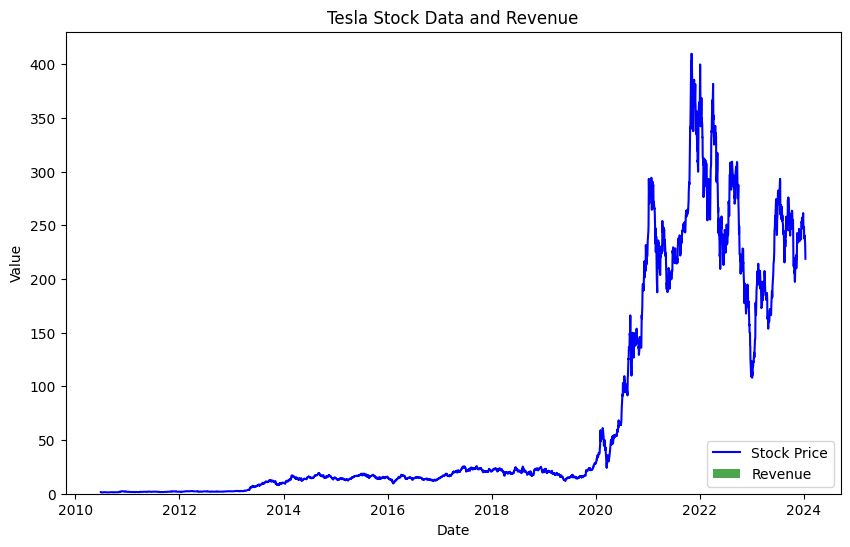

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    # Assuming the stock_data and revenue_data have a 'Date' column
    # Make sure the 'Date' column is in datetime format without timezone
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']).dt.tz_localize(None)

    # Merge the stock_data and revenue_data on the 'Date' column
    merged_data = pd.merge(stock_data, revenue_data, on='Date', how='outer')

    # Convert 'Revenue' column to numeric values
    merged_data['Revenue'] = pd.to_numeric(merged_data['Revenue'], errors='coerce')

    # Plotting the data
    plt.figure(figsize=(10, 6))

    # Plot stock data
    plt.plot(merged_data['Date'], merged_data['Close'], label='Stock Price', color='blue')

    # Plot revenue data
    plt.bar(merged_data['Date'], merged_data['Revenue'], label='Revenue', alpha=0.7, color='green')

    # Set title and labels
    plt.title(f'{stock_name} Stock Data and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')

    # Show legend
    plt.legend()

    # Display the graph
    plt.show()

# Call the make_graph function for Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')




## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


C:\Users\wilmo\AppData\Local\Temp\ipykernel_14364\3707209647.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce').dt.tz_localize(None)


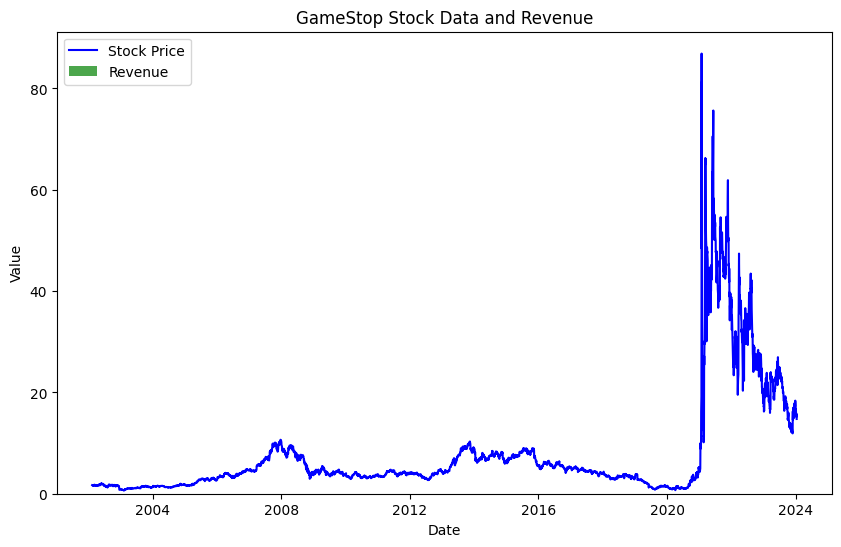

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    # Assuming the stock_data and revenue_data have a 'Date' column
    # Make sure the 'Date' column is in datetime format without timezone
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)

    # Skip rows with non-date information in the 'Date' column
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce').dt.tz_localize(None)

    # Remove rows with NaT (Not a Time) values
    revenue_data = revenue_data.dropna(subset=['Date'])

    # Merge the stock_data and revenue_data on the 'Date' column
    merged_data = pd.merge(stock_data, revenue_data, on='Date', how='outer')

    # Convert 'Revenue' column to numeric values
    merged_data['Revenue'] = pd.to_numeric(merged_data['Revenue'], errors='coerce')

    # Plotting the data
    plt.figure(figsize=(10, 6))

    # Plot stock data
    plt.plot(merged_data['Date'], merged_data['Close'], label='Stock Price', color='blue')

    # Plot revenue data
    plt.bar(merged_data['Date'], merged_data['Revenue'], label='Revenue', alpha=0.7, color='green')

    # Set title and labels
    plt.title(f'{stock_name} Stock Data and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')

    # Show legend
    plt.legend()

    # Display the graph
    plt.show()

# Call the make_graph function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
